#### Random Forests.
We are going to use ensembles which combines multiple machine learning modules into a more powerful model.
The first model to explore is Random Forests.
We can think of a Random Forest as a collection of decision trees.
<br/><br/>
**How Random Forests are better or different from single decision trees ?**
We've seen the decision trees tend to overfit on the part of the data. combining multiple trees retains their predictive power and it can reduce overfitting by averaging the results.<br/>
A distinguishing powerful feature of Random Forests is that it applies randomness when building each tree. The major parameter to specify is estimators which refers to how many trees to create.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Building the classifier with 100 decision trees
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


97% of accuracy on the test data with the default settings is pretty good !
We could obtain possibly better results by adjusting other parameters like :
* Max features which controls the randomness of each tree.
* Pre-pruning which is similar to what is done in single trees.

Feature importance is more representative than in single trees, it provides a more balnced overview of feature weights.

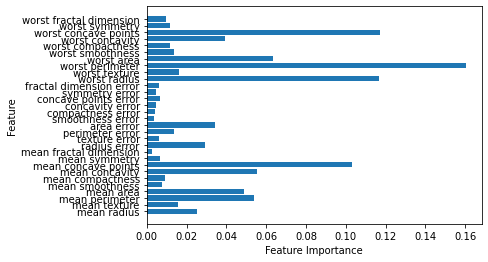

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In single trees we've seen that worst radius feature carried a significantly highr weight compared to the rest of the features which were 30.
With Random Forests we can see that many more features have a non-zero contribution, they play a heavier role in decision making compared to the single decision tree. Random Forsts, in our case, appears to provide a more informed choice.


### Potential Advantages of Random Forests

 - Powerful and widely implemented.
 - Perform well with default settings.
 - Don't require scaling of the data.
 - Randomization makes them better than single DT.
 
### Parameters to Tune
 
 - n_jobs : Number of cores to use for training (n_jobs=-1, for all cores), using two cores will double the speed compared to only using one core,
 - n_estimators : How many trees to use. More is always better, it reduces overfitting, BUT consider the training time and memory allocation, more trees drain more computer resources, 
 - max_depth, for pre-pruning,
 - max_features, for randomization. Default values are :
     - max_features = sqrt(n_features), for classification
     - max_features = log2(n_features), for regression
 - etc.
 
### Potential Disadvantages of Random Forests

- Not so good performance on very high dimensional and sparse data (text data).
- Large datasets require more resources for training (time, CPUs, etc).
- Cannot be visualized as well as single Decision Tree.